<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 셋 준비

In [2]:
wine_csv = 'https://bit.ly/wine-date'  # CSV 파일이 저장된 github 주소

In [3]:
wine = pd.read_csv(wine_csv)  # DataFrame 생성

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.tail()

,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [6]:
wine['class'].value_counts()
# 0: red wine, 1: white wine

1.0    4898
0.0    1599
Name: class, dtype: int64

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [12]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
# DataFrame에서 feature matrix(2d array)와 target vector(1d array) 생성

In [8]:
X = wine[['alcohol', 'sugar', 'pH']].values
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [10]:
y = wine['class'].values
y[:5]

array([0., 0., 0., 0., 0.])

In [15]:
# Decision Tree를 시각화할 때 사용
feature_names = wine.columns[:-1]  # 특성 이름들: [alcohol, sugar, pH]
target_names = ['red wine', 'white wine']  # 타겟 이름들(0: red, 1: white)

In [16]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [17]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [18]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [19]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([320, 980]))

# Decision Tree 분류

In [20]:
# decision tree 분류기 생성
tree_clf = DecisionTreeClassifier(random_state=42)

In [21]:
# decision tree 모델 훈련 -> tree 생성
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

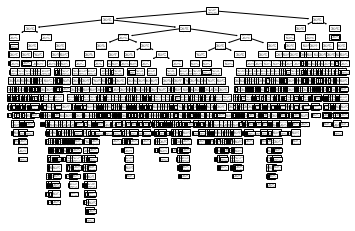

In [23]:
# decision tree 시각화
plot_tree(tree_clf)
plt.show()

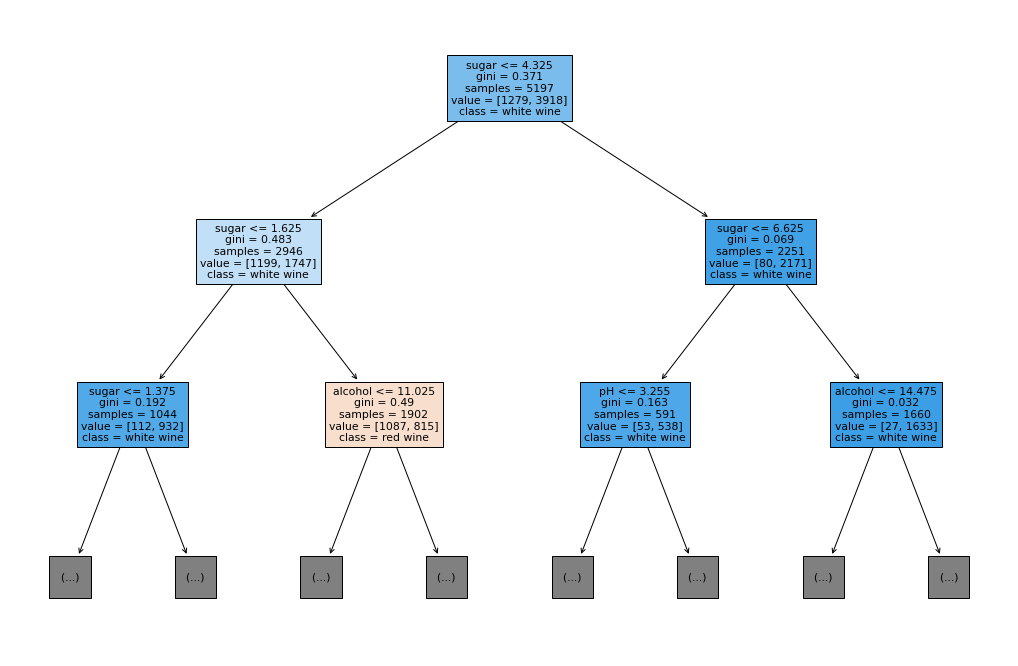

In [30]:
# decision tree가 너무 복잡하기 때문에, 처음 2개 depth까지만 시각화
plt.figure(figsize=(18, 12))
plot_tree(tree_clf, max_depth=2, filled=True,
          feature_names=feature_names, class_names=target_names)
plt.show()

**Gini impurity(불순도)**

$
Gini = 1 - \sum_i p_i^2
$

* $p_i$: i번째 클래스가 될 확률
* 이진분류(binary class)
    * gini = 1 - [(양성 클래스 확률)^2 + (음성 클래스 확률)^2]
    * 양성과 음성의 비율이 1:1인 경우, gini = 0.5. 불순도 최대
    * 양성 또는 음성으로 완벽히 분류된 경우, gini = 0. 불순도 최소
* Decision tree는 부모 노드와 자식 노드의 Gini 불순도 차이가 가능한 커지도록 tree를 성장시킴.

**Entropy(엔트로피)**

$
Entropy = - \sum_i p_i \log_k(p_i)
$

* k: 클래스의 개수(이진 분류인 경우, k = 2)
* $ p_i $: i번째 클래스가 될 확률.
* 이진 분류
    * 양성과 음성의 비율이 1:1인 경우, $ Entropy = -( \frac{1}{2} \log_2(\frac{1}{2}) + \frac{1}{2} \log_2(\frac{1}{2}) ) = 1 $. 불순도 최대인 경우.
    * 양성 또는 음성 한쪽으로 완벽히 분류된 경우, Entropy = 0. 불순도 최소인 경우.
* entropy를 decision tree의 criterion으로 사용하는 경우에는, 부모 노드와 자식 노드에서 entropy의 차이가 가능한 한 커지도록 tree를 생성.

In [31]:
# 훈련 셋 평가
train_pred = tree_clf.predict(X_train)
accuracy_score(y_train, train_pred)

0.9978833942659227

In [32]:
confusion_matrix(y_train, train_pred)

array([[1276,    3],
       [   8, 3910]])

In [33]:
# 테스트 셋 평가
test_pred = tree_clf.predict(X_test)
accuracy_score(y_test, test_pred)

0.8653846153846154

Decision tree의 장점
* 특성들을 스케일링할 필요가 없다.
* 결과를 이해하기 쉽다.

Decision tree의 단점
* 과적합(overfitting) 되기 쉽다.
* 여러가지 규제를 적용해서 과적합 문제를 해결.